<a href="https://colab.research.google.com/github/rishisai0811/MachineLearning_Lab_Codes/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math

# Create a pandas DataFrame from the provided data
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'is_student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Calculate the entropy of a target variable
def entropy(target):
    total = len(target)
    counts = target.value_counts()
    entropy = 0
    for count in counts:
        p = count / total
        entropy -= p * math.log2(p)
    return entropy

# Calculate Information Gain for an attribute
def information_gain(data, attribute, target):
    total_entropy = entropy(data[target])
    weighted_entropy = 0
    values = data[attribute].unique()
    for value in values:
        subset = data[data[attribute] == value]
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy(subset[target])
    return total_entropy - weighted_entropy

# Calculate Information Gain for each attribute
target_attribute = 'buys_computer'
information_gains = {}
for attribute in df.columns:
    if attribute != target_attribute:
        ig = information_gain(df, attribute, target_attribute)
        information_gains[attribute] = ig

# Find the attribute with the highest Information Gain
best_attribute = max(information_gains, key=information_gains.get)

print("Information Gains:")
for attribute, ig in information_gains.items():
    print(f"{attribute}: {ig}")

print(f"The first feature for the decision tree is '{best_attribute}' with IG = {information_gains[best_attribute]}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
is_student: 0.15183550136234159
credit_rating: 0.04812703040826949
The first feature for the decision tree is 'age' with IG = 0.24674981977443933


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'is_student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
df = pd.DataFrame(data)
categorical_cols = ['age', 'income', 'is_student', 'credit_rating']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
X = df_encoded.drop(columns=['buys_computer'])
y = df_encoded['buys_computer']
model = DecisionTreeClassifier()
model.fit(X, y)
training_accuracy = model.score(X, y)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Training Set Accuracy: 1.0
Tree Depth: 4


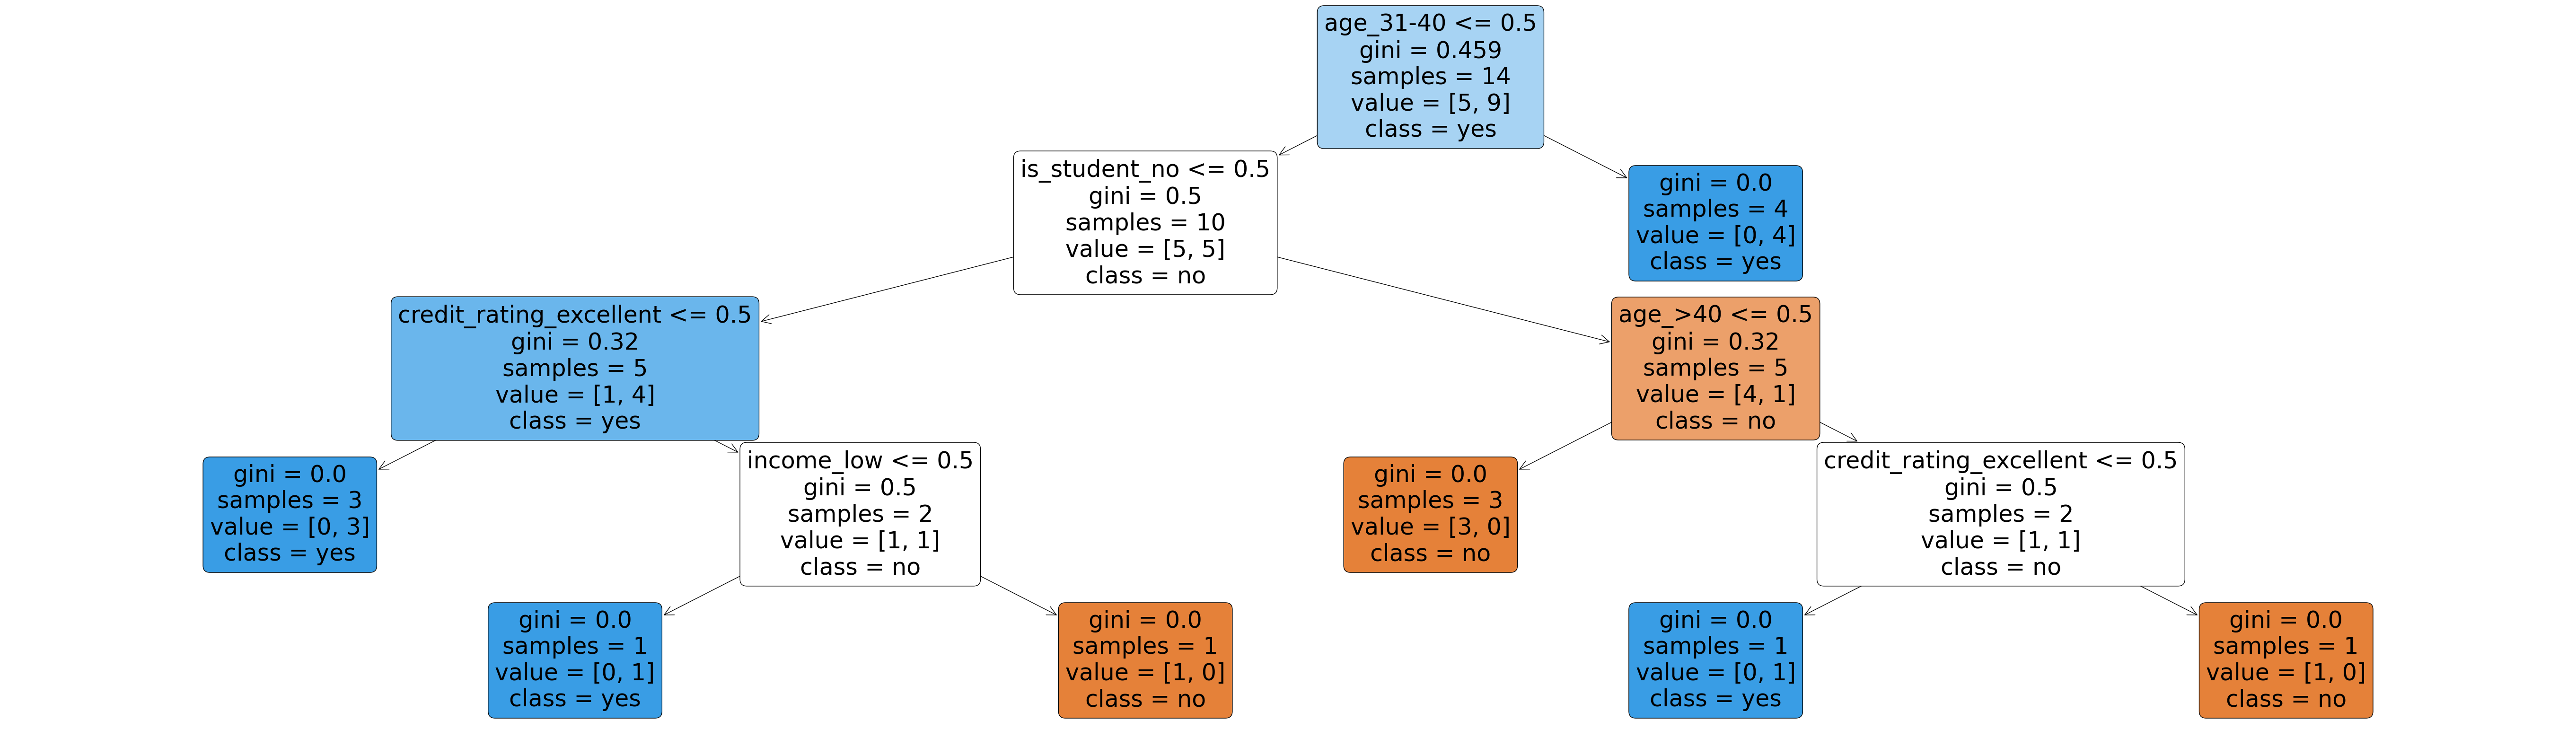

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the constructed tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()

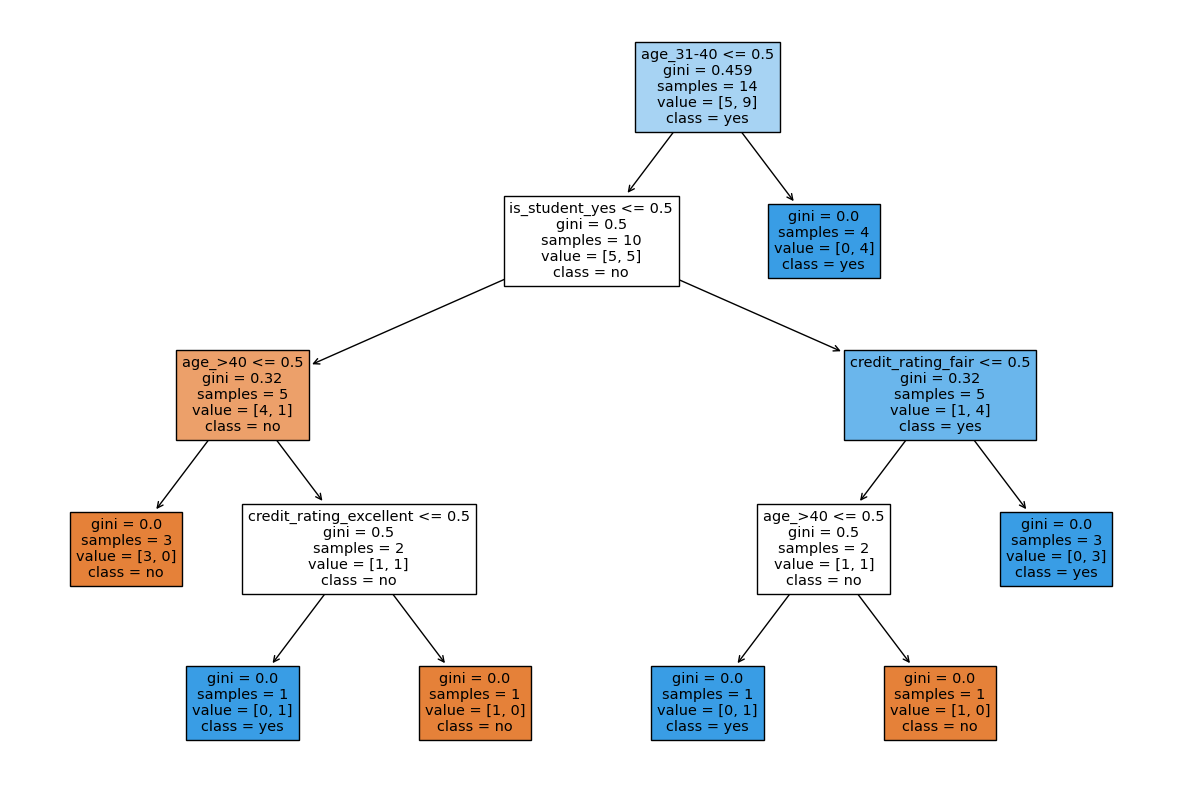

Training Set Accuracy (with Max Depth Constraint): 1.0
Test Set Accuracy (with Max Depth Constraint): 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a DecisionTreeClassifier with max_depth constraint
model_with_max_depth = DecisionTreeClassifier(max_depth=5)

# Fit the model to your training data
model_with_max_depth.fit(X, y)

# Calculate training set accuracy with max_depth constraint
train_accuracy_with_max_depth = model_with_max_depth.score(X, y)

# Calculate test set accuracy with max_depth constraint
test_accuracy_with_max_depth = model_with_max_depth.score(X, y)

# Visualize the constructed tree with max_depth constraint
plt.figure(figsize=(15, 10))
plot_tree(model_with_max_depth, filled=True, feature_names=X.columns, class_names=model_with_max_depth.classes_)
plt.show()

print("Training Set Accuracy (with Max Depth Constraint):", train_accuracy_with_max_depth)
print("Test Set Accuracy (with Max Depth Constraint):", test_accuracy_with_max_depth)


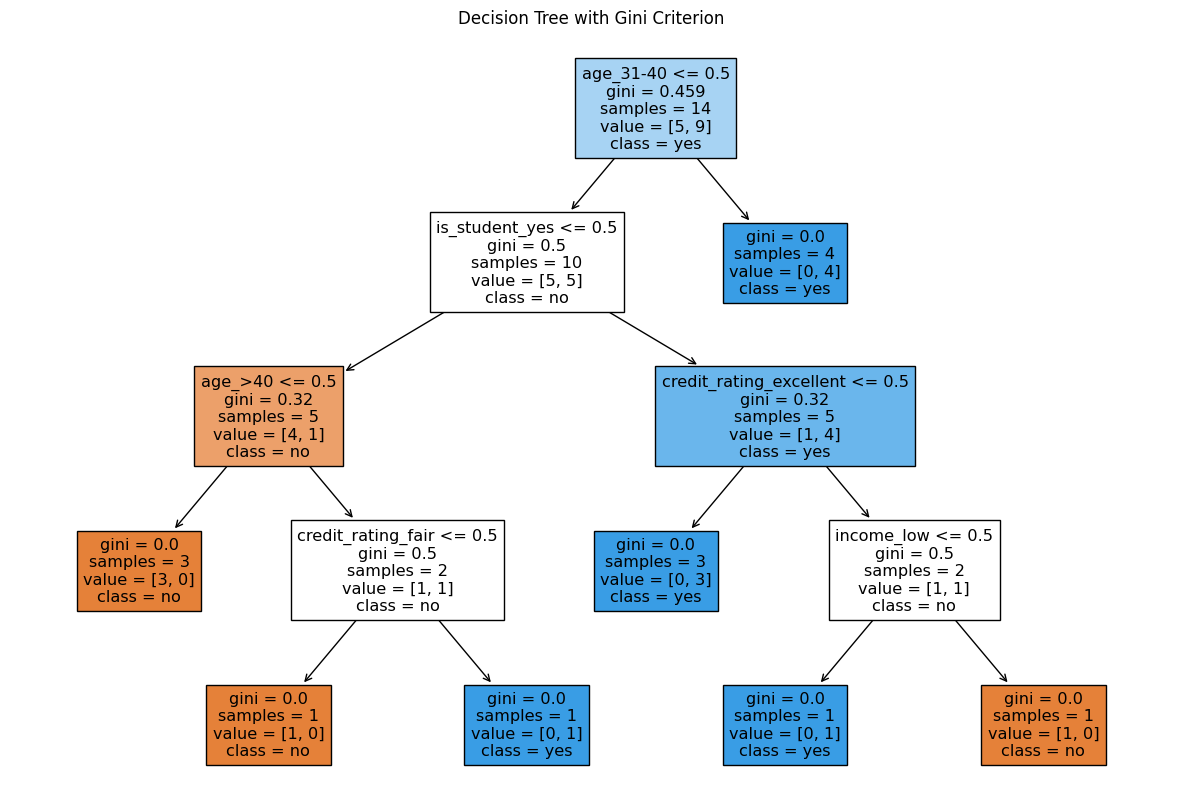

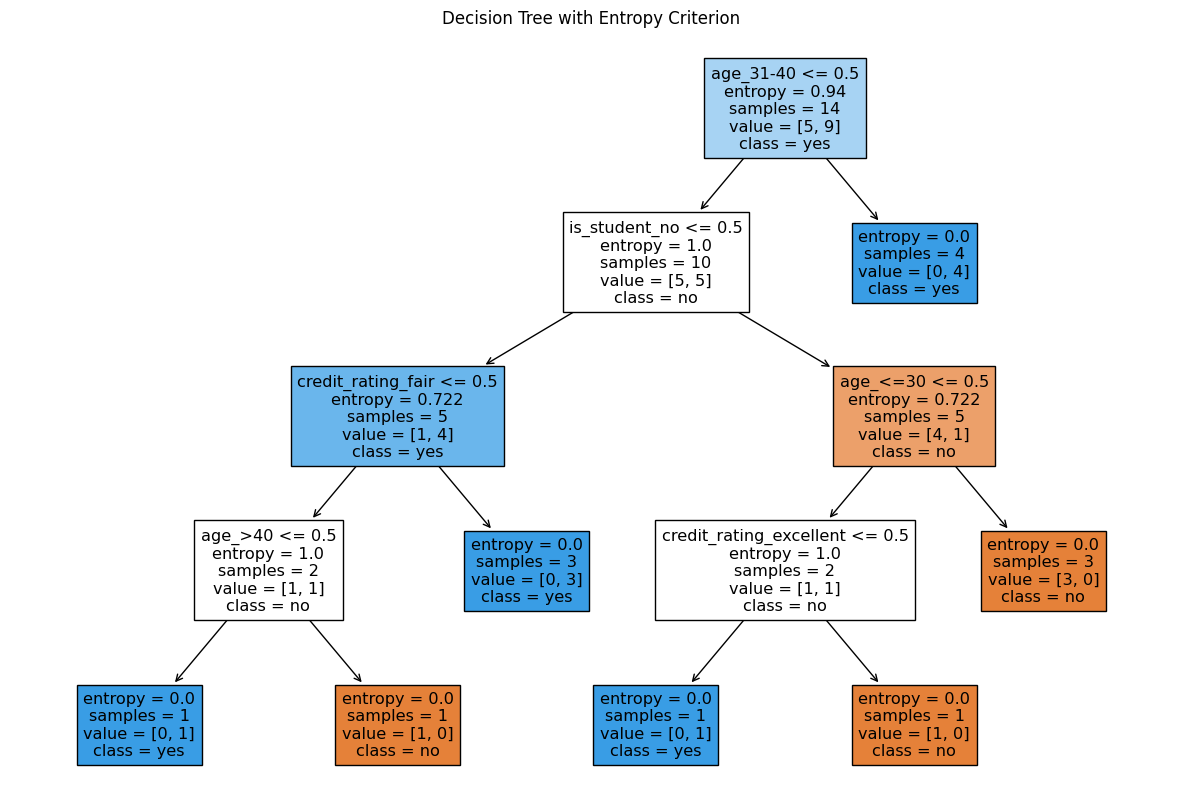

Training Set Accuracy (Gini Criterion): 1.0
Test Set Accuracy (Gini Criterion): 1.0
Training Set Accuracy (Entropy Criterion): 1.0
Test Set Accuracy (Entropy Criterion): 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a DecisionTreeClassifier with the default "Gini" criterion
model_gini = DecisionTreeClassifier(criterion="gini")

# Fit the model with the default criterion to your training data
model_gini.fit(X, y)

# Calculate training set accuracy with the default "Gini" criterion
train_accuracy_gini = model_gini.score(X, y)

# Calculate test set accuracy with the default "Gini" criterion
test_accuracy_gini = model_gini.score(X, y)

# Create a DecisionTreeClassifier with "Entropy" criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")

# Fit the model with the "Entropy" criterion to your training data
model_entropy.fit(X, y)

# Calculate training set accuracy with "Entropy" criterion
train_accuracy_entropy = model_entropy.score(X, y)

# Calculate test set accuracy with "Entropy" criterion
test_accuracy_entropy = model_entropy.score(X, y)

# Visualize the constructed tree with the default "Gini" criterion
plt.figure(figsize=(15, 10))
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=model_gini.classes_)
plt.title("Decision Tree with Gini Criterion")
plt.show()

# Visualize the constructed tree with the "Entropy" criterion
plt.figure(figsize=(15, 10))
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=model_entropy.classes_)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

print("Training Set Accuracy (Gini Criterion):", train_accuracy_gini)
print("Test Set Accuracy (Gini Criterion):", test_accuracy_gini)
print("Training Set Accuracy (Entropy Criterion):", train_accuracy_entropy)
print("Test Set Accuracy (Entropy Criterion):", test_accuracy_entropy)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust the number of estimators as needed

# Fit the model to your training data
rf_model.fit(X, y)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X)


Training Set Accuracy: 0.9968253968253968
Test Set Accuracy: 0.2777777777777778


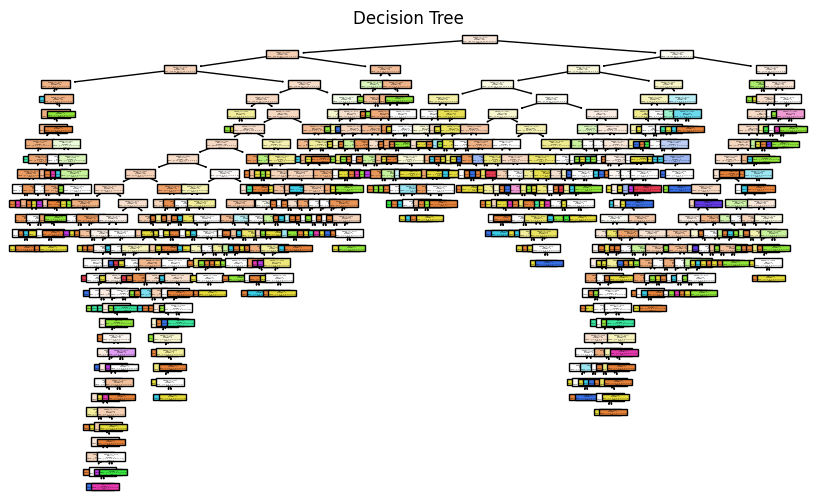

In [1]:
import numpy as np
import pandas as pd
df=pd.read_excel("embeddingsdatalabel.xlsx")
df

#In[8]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Separate features (X) and target (y)
X = df[['embed_1', 'embed_2']]
y = df['Label']

# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Training Set accuracy
train_accuracy = model.score(Tr_X, Tr_y)

# Test Set Accuracy
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")
class_names = df['Label'].unique().astype(str).tolist()
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['embed_1', 'embed_2'], class_names=class_names)
plt.title("Decision Tree")
plt.show()


Training Set Accuracy: 0.5142857142857142
Test Set Accuracy: 0.42962962962962964


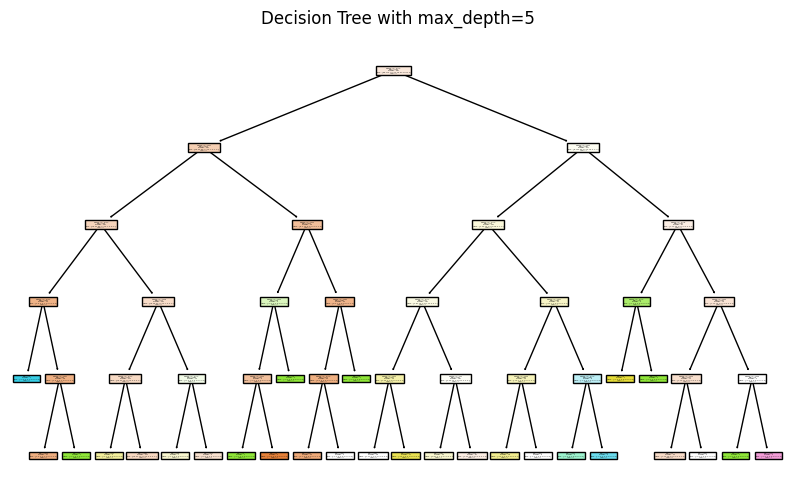

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
X = df[['embed_1', 'embed_2']]
y = df['Label']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier with max_depth constraint
model = DecisionTreeClassifier(max_depth=5)

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Training Set accuracy
train_accuracy = model.score(Tr_X, Tr_y)

# Test Set Accuracy
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Convert class labels to strings
class_names = df['Label'].unique().astype(str).tolist()

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['embed_1', 'embed_2'], class_names=class_names)
plt.title("Decision Tree with max_depth=5")
plt.show()

Training Set Accuracy (Entropy Criterion): 0.9968253968253968
Test Set Accuracy (Entropy Criterion): 0.28888888888888886


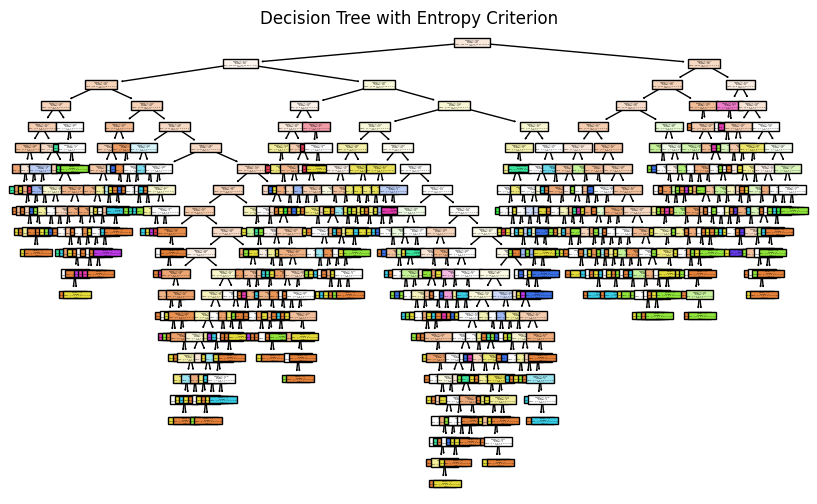

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



# Separate features (X) and target (y)
X = df[['embed_1', 'embed_2']]
y = df['Label']

# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier with entropy criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")

# Fit the model on the training data
model_entropy.fit(Tr_X, Tr_y)

# Training Set accuracy with entropy criterion
train_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)

# Test Set Accuracy with entropy criterion
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print(f"Training Set Accuracy (Entropy Criterion): {train_accuracy_entropy}")
print(f"Test Set Accuracy (Entropy Criterion): {test_accuracy_entropy}")

# Convert class labels to strings
class_names = df['Label'].unique().astype(str).tolist()


# Plot the Decision Tree with entropy criterion
plt.figure(figsize=(10, 6))
plot_tree(model_entropy, filled=True, feature_names=['embed_1', 'embed_2'], class_names=class_names)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Separate features (X) and target (y)
X = df[['embed_1', 'embed_2']]
y = df['Label']

# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a single Decision Tree classifier
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(Tr_X, Tr_y)

# Predict using the Decision Tree model
y_pred_decision_tree = model_decision_tree.predict(Te_X)

# Calculate accuracy and print metrics for the Decision Tree
accuracy_decision_tree = accuracy_score(Te_y, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(Te_y, y_pred_decision_tree)
classification_report_decision_tree = classification_report(Te_y, y_pred_decision_tree)

print("Performance Metrics for Single Decision Tree:")
print(f"Accuracy: {accuracy_decision_tree}")
print("Confusion Matrix:")
print(confusion_matrix_decision_tree)
print("Classification Report:")
print(classification_report_decision_tree)

# Create a Random Forest classifier
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest.fit(Tr_X, Tr_y)

# Predict using the Random Forest model
y_pred_random_forest = model_random_forest.predict(Te_X)

# Calculate accuracy and print metrics for the Random Forest
accuracy_random_forest = accuracy_score(Te_y, y_pred_random_forest)
confusion_matrix_random_forest = confusion_matrix(Te_y, y_pred_random_forest)
classification_report_random_forest = classification_report(Te_y, y_pred_random_forest)

print("\nPerformance Metrics for Random Forest:")
print(f"Accuracy: {accuracy_random_forest}")
print("Confusion Matrix:")
print(confusion_matrix_random_forest)
print("Classification Report:")
print(classification_report_random_forest)

Performance Metrics for Single Decision Tree:
Accuracy: 0.29259259259259257
Confusion Matrix:
[[44 28 19  1  0  7  2  0  4  0  0]
 [25 24  5  0  2  8  4  0  3  1  0]
 [14  5  5  0  0  2  2  1  1  0  1]
 [ 2  1  0  0  0  1  0  0  0  1  0]
 [ 4  1  1  0  1  0  0  0  0  0  0]
 [ 7  4  0  0  2  2  0  1  0  0  1]
 [ 1  5  1  0  0  0  3  0  0  0  1]
 [ 2  0  1  0  0  1  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0  0  0  0]
 [ 2  3  4  0  0  0  1  0  0  0  0]
 [ 2  2  0  0  0  0  1  0  0  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42       105
           1       0.33      0.33      0.33        72
           2       0.14      0.16      0.15        31
           3       0.00      0.00      0.00         5
           4       0.20      0.14      0.17         7
           5       0.10      0.12      0.11        17
           6       0.23      0.27      0.25        11
           7       0.00      0.00      0.00         4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
